In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_path = r"../pre_processed_data/pre_processed.csv"

# import pre_processed file 
pre_process_df = pd.read_csv(filepath_or_buffer=file_path, index_col=0, header=0)
pre_process_df.sample(5)

,bldg_sf,total_baths,good_ament_ct,btm_5_nbrhd,newHome,neg_ovrll_cond,adj_ovr_qual,adj_lot_area,bad_ament_ct,abnormal_sale,...,two_plus_cr_garg,sgl_famly_hm,top_3_nbrhd,homeage,remodelage,lotfrontage,garagecars,bedroomsabvgr,saleprice,log_saleprice
Id,,,,,,,,,,,,,,,,,,,,,
446,3125,1.0,1,1,0,0,3,8166,0,0,...,1,0,0,53,48,73.0,2,3,127500,11.755872
1110,3672,3.0,5,0,0,0,5,9216,0,0,...,1,0,1,5,0,107.0,3,3,280000,12.542545
38,2594,1.5,1,0,0,0,2,7235,0,0,...,1,0,0,55,14,74.0,2,3,153000,11.938193
759,2245,2.5,0,0,0,0,4,1523,1,0,...,1,1,0,9,4,24.0,2,3,179400,12.097373
743,2698,2.0,1,0,0,0,4,6926,1,0,...,1,0,0,7,1,65.0,2,3,179000,12.095141


In [3]:
len(pre_process_df.columns)

21

In [4]:
# remove target variables from data frame
X = pre_process_df.loc[:, pre_process_df.columns.difference(["saleprice", "log_saleprice"])]

y = pre_process_df["saleprice"]
y_log = pre_process_df["log_saleprice"]

print(X.shape)
print(y.shape)
y_log.shape

(1458, 19)
(1458,)


(1458,)

In [5]:
# train, test split with train set to 80%
# A linear regression model will be evaluated first in the absence of regularization
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size= 0.2, random_state=42)

In [6]:
from sklearn.linear_model import HuberRegressor, LinearRegression
# Evaluation of Huber regressor against SalePrice w/o log-transform 
# Huber regression is a linear model that is more robust to outliers than the standard model, which penalizes the model
# for higher deviations.

hr = HuberRegressor()
hr.fit(X=X_train, y=y_train)
print(f"Train R2 is {hr.score(X=X_train, y=y_train)}")
print(f"Test R2 is {hr.score(X=X_test, y=y_test)}")

Train R2 is 0.7724270146818532
Test R2 is 0.7737540355249631


C:\Users\jason\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
# Standard regression w/o log transform 
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
print(f"Train R2 is {lr.score(X=X_train, y=y_train)}")
print(f"Test R2 is {lr.score(X=X_test, y=y_test)}")

Train R2 is 0.865528013586334
Test R2 is 0.8803731496623596


In [8]:
# Standard regression w/log transform 
lr_log = LinearRegression()
lr_log.fit(X=X_train_log, y=y_train_log)
print(f"Train R2 is {lr_log.score(X=X_train_log, y=y_train_log)}")
print(f"Test R2 is {lr_log.score(X=X_test_log, y=y_test_log)}")

# There is a slight improvement (~2%) in the train R2 and test R2 utilizing log transform 

Train R2 is 0.9012482973030288
Test R2 is 0.8949971153107689


## Model Evaluation - Linear Regression
### The following section evaluates the random error, constant variance and normal distribution with mean 0 assumption of linear model in the context of the four initial models utilizing a residual plot from Yellowbrick.


In [9]:
# Residual Plot for Huber LR with no log-transform
from yellowbrick.regressor import ResidualsPlot
rpv_hr = ResidualsPlot(hr)
rpv_hr.fit(X=X_train, y=y_train)
rpv_hr.score(X=X_test, y=y_test)
rpv_hr.poof()

C:\Users\jason\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
rpv_lr = ResidualsPlot(lr)
rpv_lr.fit(X=X_train, y=y_train)
rpv_lr.score(X=X_test, y=y_test)
rpv_lr.poof()


In [11]:
# Residual Plot for LR with log transform 
rpv_lr_log = ResidualsPlot(lr_log)
rpv_lr_log.fit(X=X_train_log, y=y_train_log)
rpv_lr_log.score(X=X_test_log, y=y_test_log)
rpv_lr_log.poof()

## Model Evaluation of Ordinary Least Squares -Log Transform
- Evaluation of log-transformed OLS model as the residuals plot appeared to satisfy most of the principal assumptions of linear regression. 

In [12]:
import statsmodels.api as sm
X_add_constant = sm.add_constant(X_train_log)
ols_log = sm.OLS(y_train_log, X_add_constant)
ans_log = ols_log.fit()
print(ans_log.summary())

                            OLS Regression Results                            
Dep. Variable:          log_saleprice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     550.5
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:17:38   Log-Likelihood:                 773.09
No. Observations:                1166   AIC:                            -1506.
Df Residuals:                    1146   BIC:                            -1405.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.1488      0.025  

- based on the OLS review, several factors are deemed non-significant by the model (e.g., there is not enough evidience to support that they are important to predicting sales price). These preidctors are bedrooms, lotfrontage, and whether a home is a new home. 
- There are several coefficients that on the surface do not appear to make sense - namely the negative coefficient associated with two_plus_cr_garabe, this coefficient is negative whereas the domain association with this feature being that a two car or more garage capacity is good for a house. 
- The model will be recaliberated dropping these three features.
- homeage is being excluded in favor of remodelage due to its lower significance. 
- garagecars is being dropped because there is an overalp between that variable and the "two_plus_cr_garg" feature

In [13]:
X_train_log = X_train_log.loc[:, X.columns.difference(["bedroomsabvgr", "lotfrontage", "newHome", "homeage", "garagecars"])]
X_test_log = X_test_log.loc[:, X.columns.difference(["bedroomsabvgr", "lotfrontage", "newHome", "homeage", "garagecars"])]


lr_log.fit(X=X_train_log, y=y_train_log)
lr_log.score(X=X_test_log, y=y_test_log)
print(f"Train R2 is {lr_log.score(X=X_train_log, y=y_train_log)}")
print(f"Test R2 is {lr_log.score(X=X_test_log, y=y_test_log)}")

Train R2 is 0.8955821910594489
Test R2 is 0.8919295434632165


- The train and test R2 are very similar to the model (e.g., 90/89%) prior to dropping the four variables. 
- The residual plot and stats model output will be evaluated to confirm that the prior assumptions still hold as well as to identify any other items to potentiall exclude before proceeding to cross-validation.


In [14]:
rpv_lr_log = ResidualsPlot(lr_log)
rpv_lr_log.fit(X=X_train_log, y=y_train_log)
rpv_lr_log.score(X=X_test_log, y=y_test_log)
rpv_lr_log.poof()

In [15]:
X_add_constant = sm.add_constant(X_train_log)
ols_log = sm.OLS(y_train_log, X_add_constant)
ans_log = ols_log.fit()
print(ans_log.summary())


                            OLS Regression Results                            
Dep. Variable:          log_saleprice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:18:13   Log-Likelihood:                 740.56
No. Observations:                1166   AIC:                            -1451.
Df Residuals:                    1151   BIC:                            -1375.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.1615      0.021  

- Evaluation of OLS for non-log LR

In [16]:
X_add_constant_non_log = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_constant_non_log)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     388.2
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:18:28   Log-Likelihood:                -13659.
No. Observations:                1166   AIC:                         2.736e+04
Df Residuals:                    1146   BIC:                         2.746e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8855.0927   5854.744  

In [17]:
# Prediction error plot to further evaluate normality of residual distribution
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(lr_log, X_train_log, y_train_log)

- qq plot of prediction error appears to follow in a straight line, which is indicative of a normally distributed error term.


In [18]:
from yellowbrick.regressor import cooks_distance

cd_visualizer = cooks_distance(X=X_train, y=y_train_log)

C:\Users\jason\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


## Cross Validation through YellowBrick
- linear log model is evaluated via 4-k fold

C:\Users\jason\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


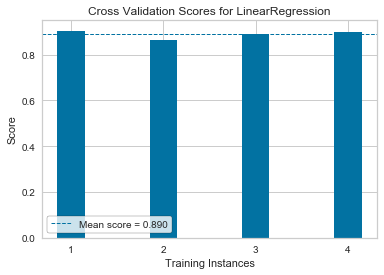

In [18]:
from sklearn.model_selection import KFold

from yellowbrick.model_selection import CVScores

# Instantiate the KFold settings
cv = KFold(n_splits=4, random_state=42)

cv_visualizer = CVScores(model=lr_log, cv=cv, scoring="r2")

cv_visualizer.fit(X=X_train_log, y=y_train_log) # fit data into visualizer 
cv_visualizer.poof()

- Median cross-validation R2 score is 89% and fairly consistent. 
- Evaluating next via sci-kit learn's model selection package


In [20]:
from sklearn.model_selection import cross_val_score
lr_r2_scores = cross_val_score(estimator = lr_log, X = X_train_log, y = y_train_log, scoring = 'r2', cv= 4)
lr_rmse = -1 * cross_val_score(estimator= lr_log, X = X_train_log, y = y_train_log, scoring = "neg_mean_squared_error", cv=4)
def display_cv_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
 
print("CV scores for R2 are:")   
display_cv_scores(lr_r2_scores)
print("")
print("CV scores for RMSE are:")
display_cv_scores(lr_rmse)

CV scores for R2 are:
Scores: [0.90428866 0.86572185 0.88986652 0.8989199 ]
Mean: 0.8896992325020114
Standard Deviation: 0.014771720534778557

CV scores for RMSE are:
Scores: [0.01445219 0.01947044 0.02003653 0.01531323]
Mean: 0.017318098775566625
Standard Deviation: 0.00246248587044963


- Based upon cross-validation and test R2, we appear to have a strong and consistent predictor of housing prices.
- The mean average is .89, which is also the value of the test R2 on the 20% hold out test-set. The standard deviation is also fairly low (e.g., 1.3%), which indicates that our model is not overly sensitive to the input data set.


## VIF Evaluation

- VIF (Variance Inflation Factor) is reviewed to determine if there is any multi-collinearity. Generally, any feature with a VIF value of 5 or higher is generally regarded as a feature that is likely to be co-linear with another feature or combination of other features in the model. 

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_vif = "+".join(X_train_log.columns)

features_target = pd.concat([X_train_log, y_train_log], axis="columns")

y_VIF, X_VIF = dmatrices('log_saleprice ~' + features_vif, features_target, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif["features"] = X_VIF.columns

vif.round(1)


,VIF Factor,features
0,32.6,Intercept
1,1.0,abnormal_sale
2,1.1,adj_lot_area
3,3.1,adj_ovr_qual
4,1.7,bad_ament_ct
5,2.7,bldg_sf
6,1.3,btm_5_nbrhd
7,3.2,good_ament_ct
8,1.2,neg_ovrll_cond
9,1.3,outside_sf


- There are no features with a VIF factor greater than 5, the general cutoff for multicollinearity "concern." The highest VIF value are 3.1 and 3.2 for adj_ovr_qual and good_ament_ct, respctively.

## Model Output as Picket Object
- Output of model object to be utilized in prediction

In [21]:
from joblib import dump

dump(lr_log, '../model_files/lr_log_model.joblib')

['../model_files/lr_log_model.joblib']

In [22]:
lr_log.predict(X_test_log)


array([12.42114622, 11.53612132, 11.65253759, 12.03283709, 12.58780694,
       11.84884693, 12.26063326, 12.62938307, 12.4861728 , 11.67356237,
       11.89263025, 12.25148718, 12.08724713, 12.55220603, 12.04339748,
       11.96704903, 12.22371934, 11.76416969, 11.67969021, 12.30070167,
       12.21605586, 12.1819362 , 12.12345756, 12.33960163, 12.2622282 ,
       11.97903334, 12.19009379, 11.63632195, 12.1082262 , 11.88395614,
       11.71996983, 11.68535211, 12.15872478, 11.56623508, 12.47780233,
       12.53259391, 11.79755487, 12.26347252, 11.55719524, 11.32885492,
       11.76248639, 12.36611672, 11.64990142, 11.61983963, 11.76813537,
       11.93834872, 11.81132531, 11.7275728 , 11.81630392, 11.82398646,
       11.90357931, 11.28862287, 11.5160027 , 11.97990977, 11.92207522,
       12.40290727, 12.29631165, 11.84056938, 11.76348809, 11.02302099,
       11.37736253, 12.20072469, 12.62852313, 12.42344178, 12.55267154,
       12.20443501, 11.48047491, 11.25705815, 11.86706736, 11.92

In [23]:
X_test_log.columns

Index(['abnormal_sale', 'adj_lot_area', 'adj_ovr_qual', 'bad_ament_ct',
       'bldg_sf', 'btm_5_nbrhd', 'good_ament_ct', 'neg_ovrll_cond',
       'outside_sf', 'remodelage', 'sgl_famly_hm', 'top_3_nbrhd',
       'total_baths', 'two_plus_cr_garg'],
      dtype='object')